In [1]:
import pymola.gen_sympy
import pylab as pl
import sympy
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%file Test.mo
model Test
    parameter Real c=10;
    Real x(start=1), v(start=1);
equation
    der(x) = v;
    der(v) = -c*x;
end Test;

Overwriting Test.mo


In [3]:
pymola.gen_sympy.main(['Test.mo', 'Test.py'])

dict {'dynamic_symbols': {u'x': {'start': u'1'}, u'v': {'start': u'1'}}, 'parameters': {u'c': u'10'}}
eq type: <class 'pymola.generated.ModelicaParser.Equation_simpleContext'>
SIMPLE
eq type: <class 'pymola.generated.ModelicaParser.Equation_simpleContext'>
SIMPLE


In [4]:
import Test

In [5]:
test = Test.Model()

x: Matrix([[x(t)], [v(t)]])
f: Matrix([[v(t)], [-c*x(t)]])
p: [c]


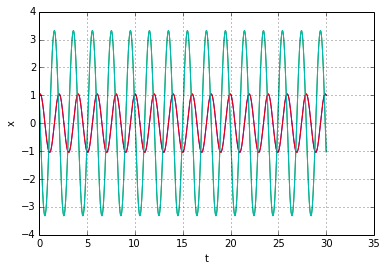

In [6]:
data = test.simulate();
pl.plot(data['t'], data['x'])
pl.xlabel('t')
pl.ylabel('x')
pl.grid()

In [7]:
x = test.x
x

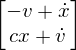

In [8]:
f = sympy.Matrix(test.eqs)
f

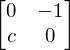

In [9]:
A = f.jacobian(x)
A